In [1]:
import os
import pydicom
import cv2
import numpy as np
import tensorflow as tf
import time

data_path = "D:\\MRI Work\\fastMRI_dataset\\fastMRI_short"

# preprocessing
def preprocess_dicom(dicom_path):
    dicom = pydicom.dcmread(dicom_path)
    image = dicom.pixel_array
    image = cv2.resize(image, (224, 224))
    image = image.astype(np.float32) / np.max(image)
    return image

# loading
def load_data(data_path):
    images = []
    labels = []
    file_count = 0
    start_time = time.time()
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                image = preprocess_dicom(dicom_path)
                images.append(image)
                dicom = pydicom.dcmread(dicom_path)
                patient_age_str = dicom.get("PatientAge", None)

                if patient_age_str: # removing the "Y"
                    age = int(patient_age_str[:-1])
                    labels.append(age)
                else:
                    print(f"Patient's Age not found in {dicom_path}")
                    continue
                file_count += 1
                if file_count % 100 == 0:
                    elapsed_time = time.time() - start_time
                    print(f"Processed {file_count} files in {elapsed_time:.2f} seconds")
    total_time = time.time() - start_time
    print(f"Processed {file_count} files in {total_time:.2f} seconds")

    return np.array(images), np.array(labels)

X, y = load_data(data_path)

# grayscale images
X = np.expand_dims(X, axis=-1)

C:\Users\jjadd\anaconda3\lib\site-packages\openjpeg\utils.py:314: UserWarning: The (0028,0101) Bits Stored value '12' in the dataset does not match the component precision value '16' found in the JPEG 2000 data. It's recommended that you change the Bits Stored value to produce the correct output
  warnings.warn(


Processed 100 files in 2.04 seconds
Processed 200 files in 2.91 seconds
Processed 300 files in 4.83 seconds
Processed 400 files in 7.20 seconds
Processed 500 files in 9.96 seconds
Processed 600 files in 10.86 seconds
Processed 700 files in 11.75 seconds
Processed 800 files in 12.66 seconds
Processed 900 files in 13.54 seconds
Processed 1000 files in 15.95 seconds
Processed 1100 files in 17.55 seconds
Processed 1200 files in 18.78 seconds
Processed 1300 files in 21.15 seconds
Processed 1400 files in 22.19 seconds
Processed 1500 files in 23.23 seconds
Processed 1600 files in 24.17 seconds
Processed 1700 files in 25.75 seconds
Processed 1800 files in 27.31 seconds
Processed 1900 files in 28.87 seconds
Processed 2000 files in 29.30 seconds
Processed 2100 files in 30.41 seconds
Processed 2200 files in 31.67 seconds
Processed 2300 files in 32.69 seconds
Processed 2400 files in 34.35 seconds
Processed 2500 files in 36.63 seconds
Processed 2600 files in 38.30 seconds
Processed 2700 files in 39

In [7]:
# model
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(128, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

input_shape = (224, 224, 1)
model = build_model(input_shape)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
95/95 [==============================] - 598s 6s/step - loss: 640.2355 - mae: 20.3700 - val_loss: 495.0091 - val_mae: 17.8870
Epoch 2/10
95/95 [==============================] - 610s 6s/step - loss: 475.6357 - mae: 18.1880 - val_loss: 453.9357 - val_mae: 18.1067
Epoch 3/10
95/95 [==============================] - 633s 7s/step - loss: 463.2850 - mae: 17.9387 - val_loss: 448.4327 - val_mae: 17.8992
Epoch 4/10
95/95 [==============================] - 616s 6s/step - loss: 460.0583 - mae: 17.8935 - val_loss: 446.2277 - val_mae: 17.7182
Epoch 5/10
53/95 [===============>..............] - ETA: 4:07 - loss: 488.6819 - mae: 18.4207

24/24 [==============================] - 15s 642ms/step - loss: 189.8911 - mae: 10.9066
Validation MAE: 10.906579971313477


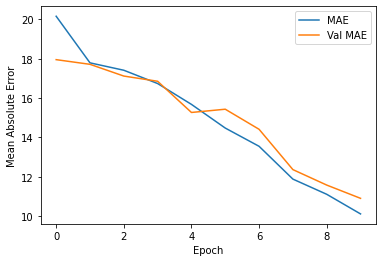

In [4]:
# Evaluate the model
val_loss, val_mae = model.evaluate(X_val, y_val)
print(f"Validation MAE: {val_mae}")

# Optional: Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_val)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

24/24 [==============================] - 10s 425ms/step
Mean Absolute Error (MAE): 10.906580143732741
Mean Squared Error (MSE): 189.8911447169449
Root Mean Squared Error (RMSE): 13.780099590240445
